In [64]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import pandas as pd
from sklearn.model_selection import KFold 




data=pd.read_spss('/Users/robleech/Downloads/SPSSVarsforjohnny.sav')
FAC=np.asarray([data.FAC1_1, data.FAC2_1,data.FAC3_1,data.FAC4_1]).T
GRAD=np.asarray([data.Gradient1, data.Gradient2,data.Gradient3]).T
KeepIndex=~np.isnan(FAC[:,0])


In [65]:

Tasklabels,Taskindices=np.unique(data.Task_name,return_inverse=True)
FAC_TaskCentres=np.zeros([12,4])
for i in range(12):
    FAC_TaskCentres[i,:]=FAC[Taskindices==i+1,:].mean(axis=0)

Grad_TaskCentres=np.zeros([12,2])
for i in range(12):
    #Grad_TaskCentres[i,:]=GRAD[Taskindices==i+1,(0,2)].mean(axis=0)
    Grad_TaskCentres[i,:]=GRAD[np.ix_(Taskindices==(i+1),[0,2])].mean(axis=0)


/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.1. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: Converg

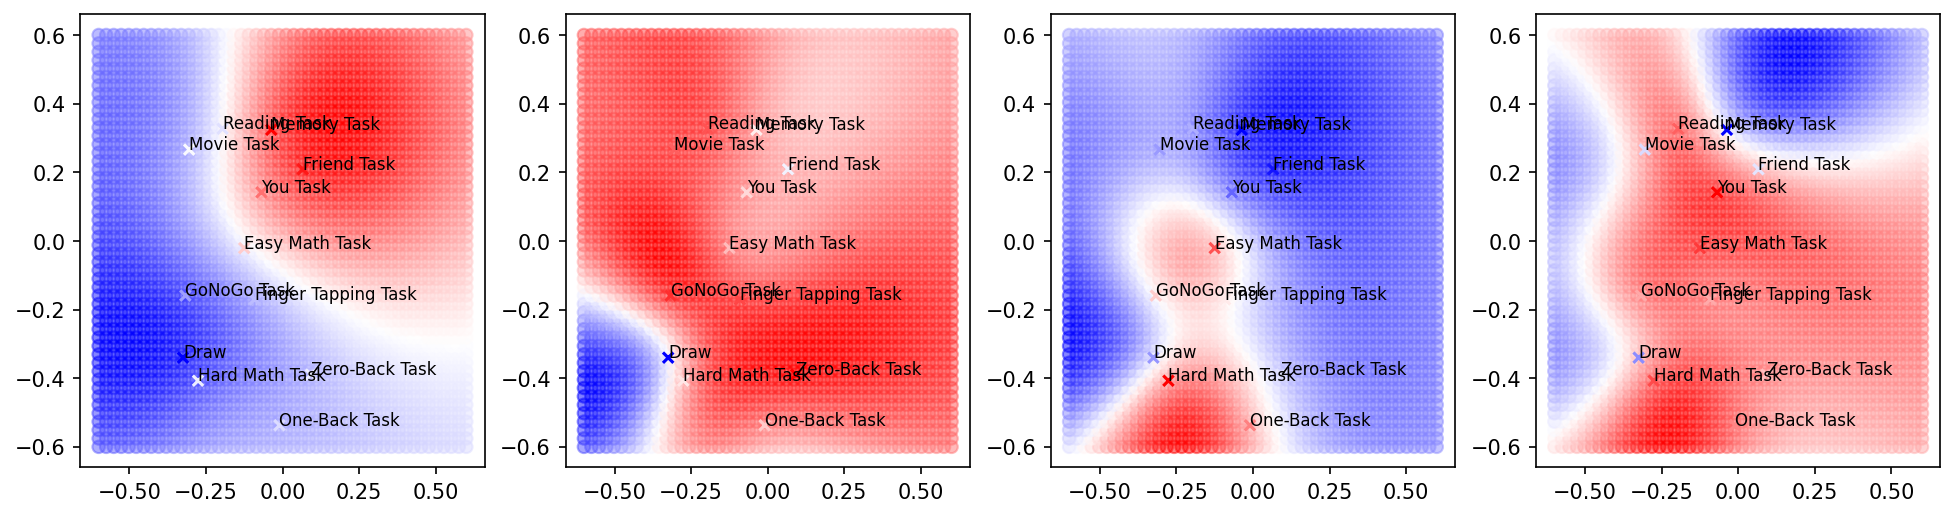

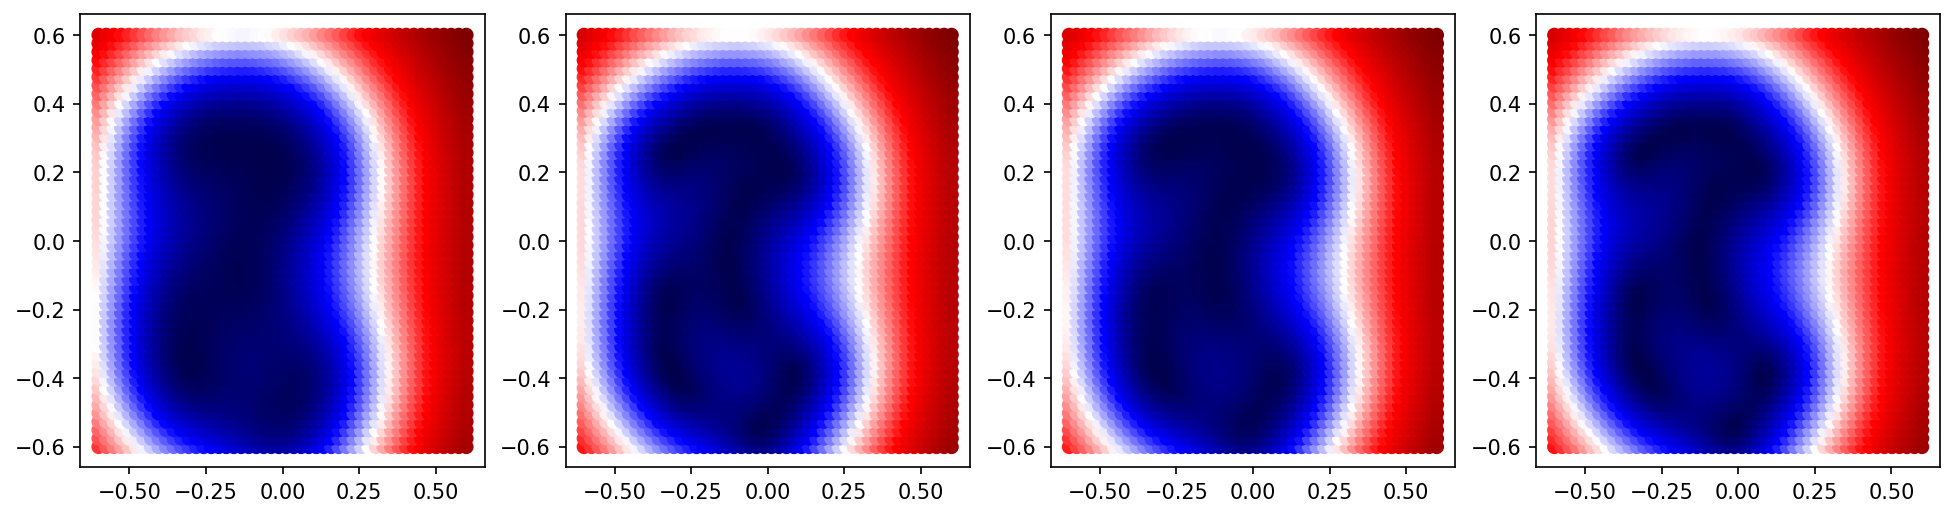

In [66]:
#Fit whole dataset
    
fig, axs = plt.subplots(1,4,figsize=(16, 4), dpi=150)
fig2, axs2 = plt.subplots(1,4,figsize=(16, 4), dpi=150)


for i in range(4):
    standardscaler=StandardScaler()
    #X_train = GRAD[KeepIndex,(0,2)]
    X=Grad_TaskCentres

    y = standardscaler.fit_transform(FAC_TaskCentres[:,i].reshape(-1,1))    
    kernel = 1.0 * Matern(length_scale=0.5, length_scale_bounds=(0.5, 1), nu=2.5)+ WhiteKernel(noise_level_bounds=[0.001,0.1],noise_level=0.05)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=3,normalize_y=False,alpha=0)
    gpr.fit(X, y)

    lim = 0.6
    res = 50
    lin = np.linspace(-lim, lim, res)

    # x1.shape = (50, 50)
    x1, x2 = np.meshgrid(lin, lin)
    # xx.shape = (2500, 2)
    xx = np.vstack((x1.flatten(), x2.flatten())).T
    y_mean, y_sd = gpr.predict(xx, return_std=True)


    axs[i].scatter(x1, x2, c=y_mean,cmap='bwr',alpha=0.5)

    axs[i].scatter(Grad_TaskCentres[:,0], Grad_TaskCentres[:, 1],s=25,marker='x',c=FAC_TaskCentres[:,i],cmap='bwr')#,c=y_train, s=2,cmap='plasma')

    for j in range(12):
        axs[i].text(Grad_TaskCentres[j,0],Grad_TaskCentres[j,1],  Tasklabels[j+1], size=8, zorder=1,color='k') 

    axs2[i].scatter(x1, x2, c=y_sd,cmap='seismic')

    #axs2[i].set_ylim([0,1])

#plt.scatter(X_train[:,0], X_train[:, 1],c=y_train, s=2)


In [81]:
# Do in 3 gradient dimensions
Tasklabels,Taskindices=np.unique(data.Task_name,return_inverse=True)
FAC_TaskCentres=np.zeros([12,4])
for i in range(12):
    FAC_TaskCentres[i,:]=FAC[Taskindices==i+1,:].mean(axis=0)

Grad_TaskCentres=np.zeros([12,3])
for i in range(12):
    #Grad_TaskCentres[i,:]=GRAD[Taskindices==i+1,(0,2)].mean(axis=0)
    Grad_TaskCentres[i,:]=GRAD[np.ix_(Taskindices==(i+1),[0,1,2])].mean(axis=0)


/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: Co

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.5. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: Con

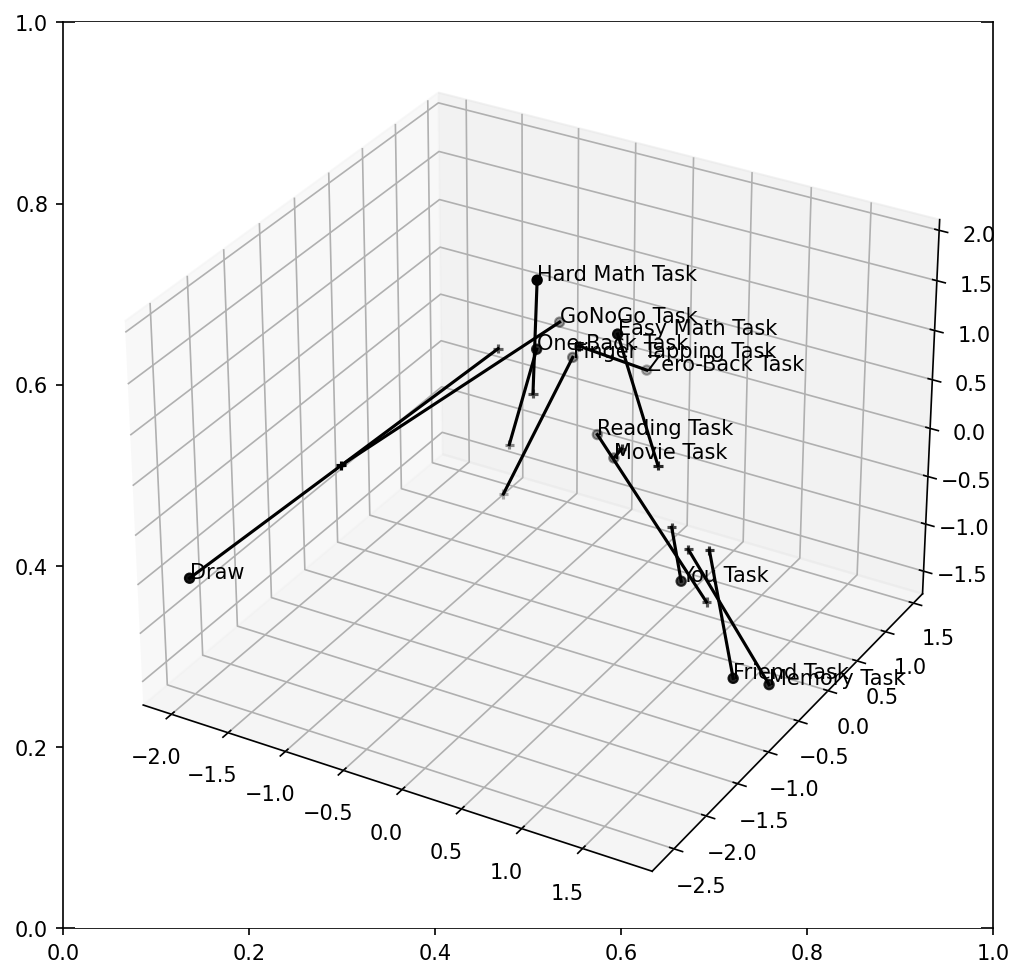

In [77]:


#Assess out of sample prediction with 3d gradient

fig, axs = plt.subplots(1,1,figsize=(8, 8), dpi=150)

k = 12
kf = KFold(n_splits=k, random_state=None)
numFac=3

X=Grad_TaskCentres
standardscaler=StandardScaler()
avg_acc_score=np.zeros([numFac])
pred_Fac=np.zeros([12,numFac])
real_Fac=np.zeros([12,numFac])

for i in range(numFac):
    acc_score = []
    y = standardscaler.fit_transform(FAC_TaskCentres[:,i].reshape(-1,1))    

    for train_index , test_index in kf.split(X):

        X_train , X_test = X[train_index,:],X[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        kernel = 1.0 * Matern(length_scale=0.5, length_scale_bounds=(0.5, 1), nu=2.5)+ WhiteKernel(noise_level_bounds=[0.001,0.5],noise_level=0.05)
        gpr = GaussianProcessRegressor(kernel=kernel, random_state=3,normalize_y=False,alpha=0.0)

        gpr.fit(X_train, y_train)
        pred_values = gpr.predict(X_test)
        pred_Fac[test_index,i]=pred_values
        real_Fac[test_index,i]=y_test
        acc=np.abs(pred_values-y_test.T).sum()
        acc_score.append(acc)
        
    avg_acc_score[i] = np.median(acc_score)

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(pred_Fac[:,0],pred_Fac[:,1],pred_Fac[:,2],c='k',marker='+')
ax.scatter(real_Fac[:,0],real_Fac[:,1],real_Fac[:,2],c='k',marker='o')

for i in range(12):
    ax.plot([pred_Fac[i,0],real_Fac[i,0]],[pred_Fac[i,1],real_Fac[i,1]],[pred_Fac[i,2],real_Fac[i,2]],c='k',marker='')
    ax.text(real_Fac[i,0],real_Fac[i,1],real_Fac[i,2],Tasklabels[i+1],c='k')
    

In [78]:
np.power(np.power(pred_Fac-real_Fac,2).mean(axis=1),0.5)

array([1.6803845 , 0.8137669 , 0.66410799, 0.64341282, 1.26112778,
       0.86971313, 1.30369652, 0.59816979, 0.65919216, 0.94649406,
       0.76689003, 0.86707974])

In [79]:
avg_acc_score

array([0.37200314, 0.66227528, 0.93030168, 0.70462649])

In [110]:

Tasklabels,Taskindices=np.unique(data.Task_name,return_inverse=True)
FAC_TaskCentres=np.zeros([12,4])
for i in range(12):
    FAC_TaskCentres[i,:]=FAC[Taskindices==i+1,:].mean(axis=0)

Grad_TaskCentres=np.zeros([12,3])
for i in range(12):
    #Grad_TaskCentres[i,:]=GRAD[Taskindices==i+1,(0,2)].mean(axis=0)
    Grad_TaskCentres[i,:]=GRAD[Taskindices==i+1,:].mean(axis=0)


In [240]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

k = 4
kernel = 1.0 * Matern(length_scale=0.5, length_scale_bounds=(0.5, 1), nu=2.5) #+WhiteKernel(noise_level_bounds=[0.001,0.5],noise_level=0.1)
kf = KFold(n_splits=k, random_state=None)



gpr = GaussianProcessRegressor(kernel=kernel, random_state=None,normalize_y=True,alpha=0.1)
X=Grad_TaskCentres
#X=FAC_TaskCentres
standardscaler=StandardScaler()
#y = standardscaler.fit_transform(FAC_TaskCentres[:,0].reshape(-1,1))    
y = FAC_TaskCentres[:,0]
#y = standardscaler.fit_transform(Grad_TaskCentres[:,2].reshape(-1,1))    



#score_gradfac, perm_scores_gradfac, pvalue_gradfac = permutation_test_score(gpr, X, y, scoring="neg_root_mean_squared_error", cv=kf, n_permutations=100)
score_gradfac, perm_scores_gradfac, pvalue_gradfac = permutation_test_score(gpr, X, y, scoring="neg_mean_absolute_error", cv=kf, n_permutations=1000)




/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

In [241]:
score_gradfac


-0.3024489650273653

In [242]:
pvalue_gradfac

0.005994005994005994